In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
train_sets = pd.read_csv("C:/Users/Administrator/ml_python/ex1/kaggle/Project/Proj5_MB/train.csv")
test_sets = pd.read_csv("C:/Users/Administrator/ml_python/ex1/kaggle/Project/Proj5_MB/test.csv")
print("Train shape : ", train_sets.shape)
print("Test shape : ", test_sets.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


Look at the data frame.

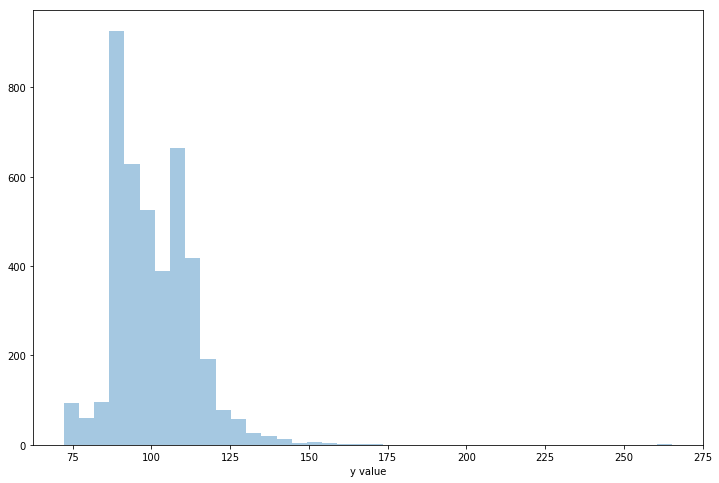

In [2]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.distplot(train_sets.y.values, bins=40, kde=False)
plt.xlabel('y value', fontsize=10)
plt.show()


From the histogram, it seems appear an abnormal point whose y is above 175.

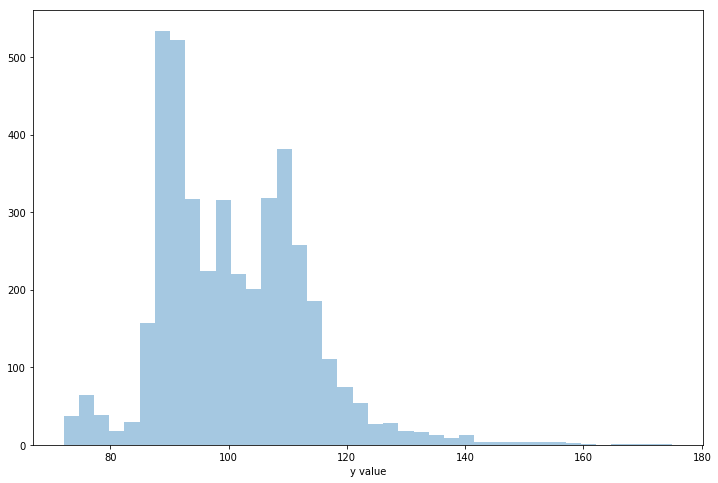

In [3]:
upper_bound = 175
train_sets['y'].loc[train_sets['y']>upper_bound] = upper_bound

plt.figure(figsize=(12,8))
sns.distplot(train_sets.y.values, bins=40, kde=False)
plt.xlabel('y value', fontsize=10)
plt.show()

After fixing the bad point, the distribution looks better.It seems belongs to a skewed distribution.

In [4]:
#Data type
feature_train= train_sets.drop(['ID','y'], axis=1)
feature_types = feature_train.dtypes.reset_index()
feature_types.columns = ["Count", "Feature Type"]
feature_types.groupby("Feature Type").aggregate('count').reset_index()

,Feature Type,Count
0,int64,368
1,object,8


The features contains 368 logistic features and 8 classification features.

In [5]:
#Find missing values
feature_missing = feature_train.isnull().sum(axis=0).reset_index()
feature_missing.columns = ['feature_name', 'count']
feature_missing


,feature_name,count
0,X0,0
1,X1,0
2,X2,0
3,X3,0
4,X4,0
5,X5,0
6,X6,0
7,X8,0
8,X10,0
9,X11,0


Luckily, there's no missing value of all features. If it exist, we have to implement them.

In [6]:
feature_missing = feature_missing.loc[feature_missing['count']>0]
feature_missing = feature_missing.sort_values(by='count')
feature_missing

,feature_name,count


Show missing features' names.

In [7]:
drop_list=[]
print("Raw shape : ", train_sets.shape)
for features in feature_train.columns:
    if features not in ['X0','X1','X2','X3','X4','X5','X6','X8']:
        if sum(feature_train[features])<=train_sets.shape[0]*0.002:
            drop_list.append(features)
            train_sets= train_sets.drop([features], axis=1)
        if sum(feature_train[features])>=train_sets.shape[0]*0.998:
            drop_list.append(features)
            train_sets= train_sets.drop([features], axis=1)
print ('Abandoned features:',drop_list)
print("New shape : ", train_sets.shape)


Raw shape :  (4209, 378)
Abandoned features: ['X11', 'X15', 'X24', 'X33', 'X39', 'X40', 'X42', 'X59', 'X60', 'X67', 'X74', 'X83', 'X86', 'X87', 'X89', 'X91', 'X92', 'X93', 'X95', 'X104', 'X107', 'X110', 'X124', 'X145', 'X153', 'X160', 'X167', 'X184', 'X190', 'X204', 'X205', 'X207', 'X210', 'X213', 'X233', 'X235', 'X236', 'X245', 'X248', 'X252', 'X253', 'X257', 'X259', 'X260', 'X262', 'X266', 'X268', 'X269', 'X270', 'X277', 'X278', 'X280', 'X288', 'X289', 'X290', 'X293', 'X295', 'X296', 'X297', 'X318', 'X319', 'X330', 'X332', 'X339', 'X347', 'X357', 'X366', 'X369', 'X372', 'X383', 'X384', 'X385']
New shape :  (4209, 306)


For those logistic features, if it is too sparse, we can abandoned them.

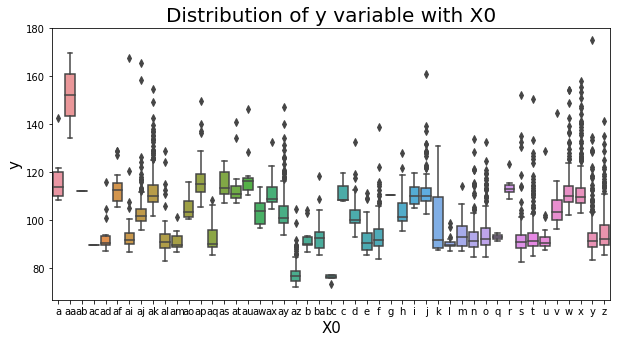

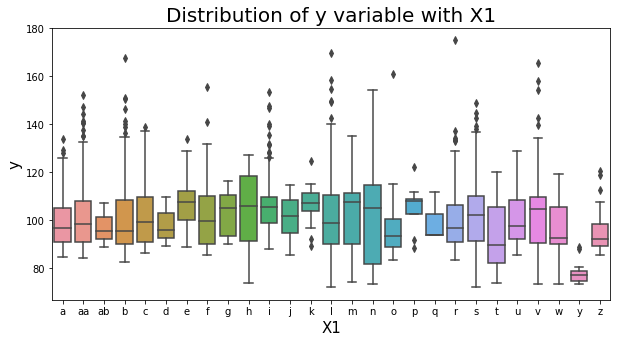

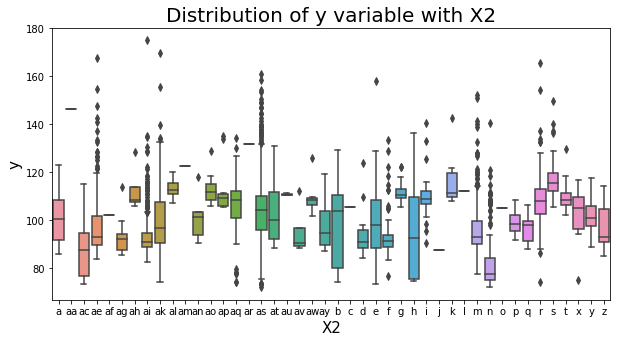

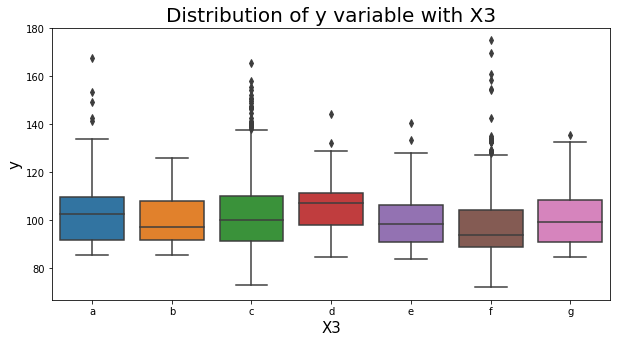

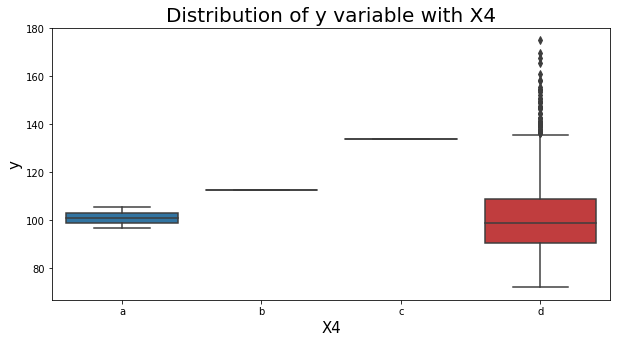

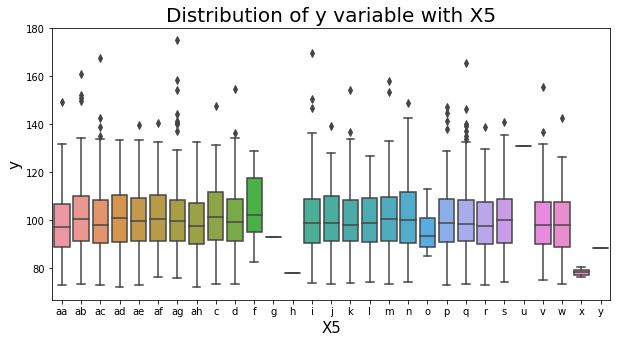

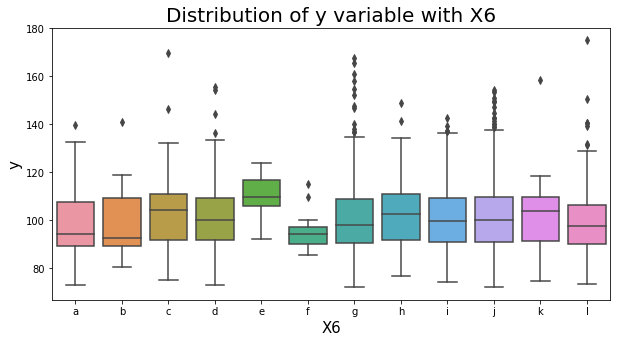

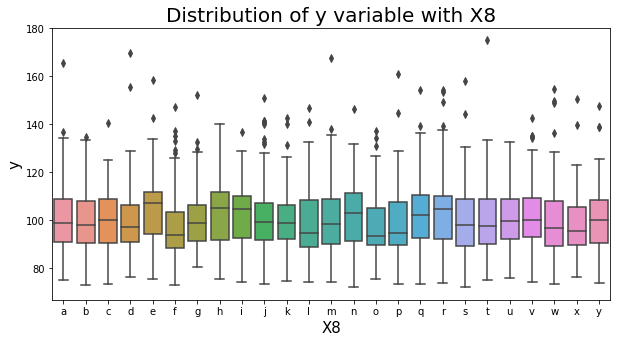

In [8]:
for features in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    feature_classification = np.sort(train_sets[features].unique()).tolist()
    plt.figure(figsize=(10,5))
    sns.boxplot(x=features, y='y', data=train_sets, order=feature_classification)
    plt.xlabel(features, fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.title("Distribution of y variable with "+features, fontsize=20)
    plt.show()

Show the distribution of all classes of those classification features. If two distribution of different classes are too close, we can consider combining them.

Feature X0 dropped the classification of ['aa', 'ab', 'ac', 'ao', 'c', 'g', 'q']
Feature X1 dropped the classification of ['ab', 'd', 'q']
Feature X2 dropped the classification of ['aa', 'af', 'ah', 'am', 'ar', 'au', 'av', 'c', 'j', 'l', 'o', 'p']
Feature X3 dropped the classification of []
Feature X4 dropped the classification of ['a', 'b', 'c']
Feature X5 dropped the classification of ['g', 'h', 'u', 'x', 'y']
Feature X6 dropped the classification of []
Feature X8 dropped the classification of []


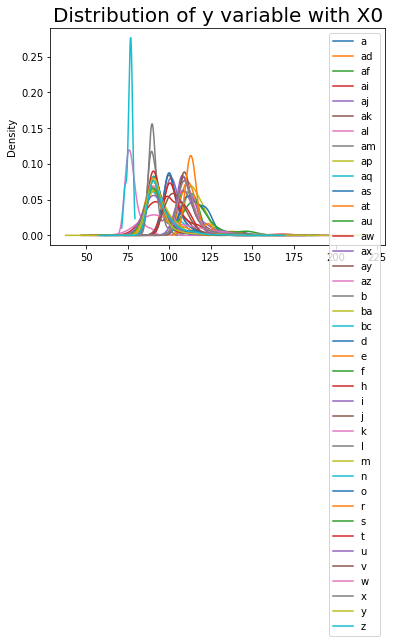

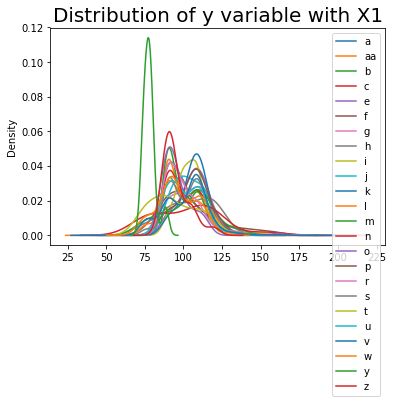

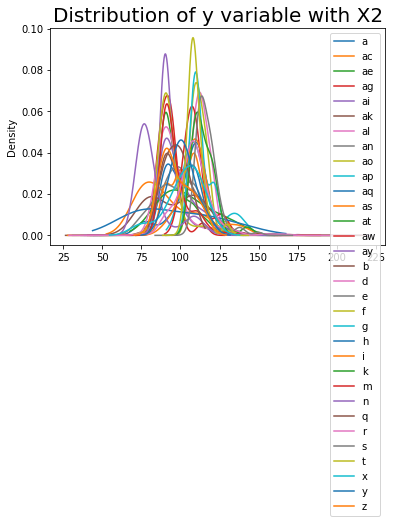

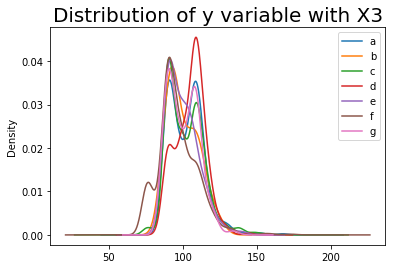

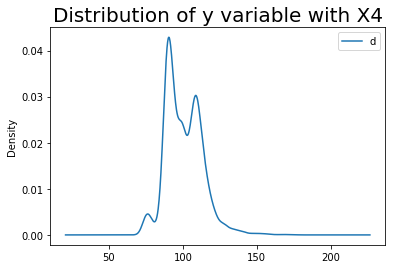

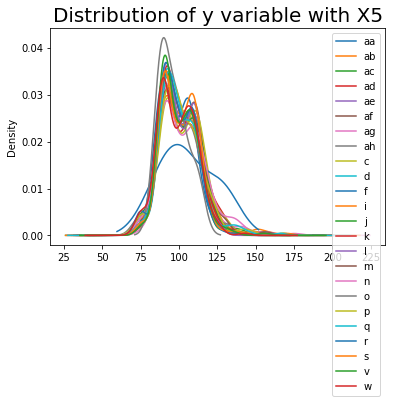

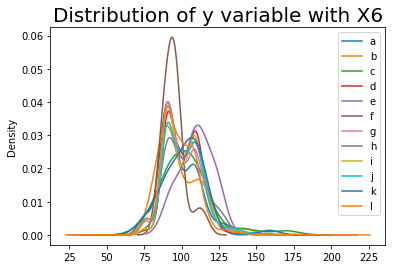

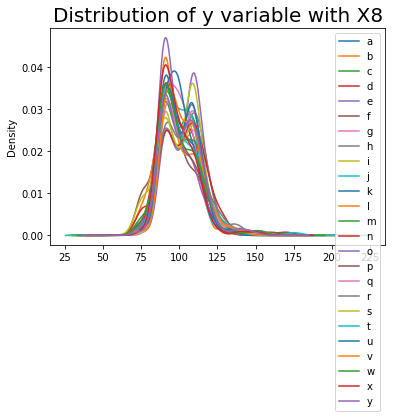

In [9]:
for features in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    feature_classification = np.sort(train_sets[features].unique()).tolist()
    fig=plt.figure()
    fig.set(alpha=1)
    drop_list=[]
    label=[]
    for cls in feature_classification:
        temp = train_sets.loc[train_sets[features] == cls]
        if temp.shape[0]<=train_sets.shape[0]*0.001:
            drop_list.append(cls)
    print ('Feature',features,'dropped the classification of',drop_list[:])
    
    
    for cls in feature_classification:
        if cls not in drop_list:
            train_sets.y[train_sets[features]==cls].plot(kind='kde')
            label.append(cls)
    plt.legend(label,loc='best')
    plt.title("Distribution of y variable with "+features, fontsize=20)
    
    
    for drops in drop_list:
        train_sets[features][train_sets.loc[(train_sets[features]==drops)==True][features].index]='zero'

Another way to display distribution.

In [10]:
bins=np.histogram(train_sets['y'],bins=100,normed=False)
epsilon=0.87
for features in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    feature_classification = np.sort(train_sets[features].unique()).tolist()
    drop_list=[]
    label=[]
    for cls in feature_classification:
        temp = train_sets.loc[train_sets[features] == cls]
        if temp.shape[0]<=train_sets.shape[0]*0.01:
            drop_list.append(cls)
    for cls in feature_classification:
        if cls not in drop_list:
            drop_list.append(cls)
            for cls2 in feature_classification:
                if cls2 not in drop_list:
                    temp1 = train_sets.loc[train_sets[features] == cls]
                    temp1 = temp1['y']
                    hist1=[]
                    px=[]
                    for i in range(100):
                        count=0
                        for num in temp1:
                            if num >= bins[1][i] and num<= bins[1][i+1]:
                                count+=1
                        hist1.append(count/len(temp1))

                    temp2 = train_sets.loc[train_sets[features] == cls2]
                    temp2 = temp2['y']
                    hist2=[]
                    py=[]
                    for i in range(100):
                        count=0
                        for num in temp2:
                            if num >= bins[1][i] and num<= bins[1][i+1]:
                                count+=1
                        hist2.append(count/len(temp2))
                    hist1 = np.array(hist1)
                    hist2 = np.array(hist2)
                    entropy = pd.DataFrame(columns=['H'])  
                    sum=0
                    entropy=hist1*np.log10(hist1/hist2)
                    indx_nan = np.isnan(entropy)  
                    indx_inf = np.isinf(entropy)  
                    entropy[indx_nan] = 0  
                    entropy[indx_inf] = 0  
                    for i in entropy:
                        sum+=i
                    if sum>epsilon:
                        print (cls,'and',cls2,'have close distribution with KL-divergence of'
                               ,sum,'in feature',features)
print('Done')

aj and y have close distribution with KL-divergence of 0.8734341480519353 in feature X0
ak and t have close distribution with KL-divergence of 0.8987910175735133 in feature X0
j and t have close distribution with KL-divergence of 1.0023560627577133 in feature X0
j and y have close distribution with KL-divergence of 0.8818049725076215 in feature X0
j and z have close distribution with KL-divergence of 0.9150058980575703 in feature X0
Done


Find distributions which are close using KL-divergence, so we could combine them.

In [11]:
def classification(sets):
    for ones in ['t','ak','z','j','y','aj']:
        sets['X0'][sets.loc[(sets['X0']==ones)==True][features].index]='one'
classification(train_sets)


Combining close distributions. It is neccessary to write this in a function way so we could do the same combining to test sets without writing codes again.

In [12]:
X=train_sets.drop(['y','ID'], axis=1)
y=train_sets['y']
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

from sklearn.feature_extraction import DictVectorizer
DV=DictVectorizer(sparse=False)
X_train=DV.fit_transform(X_train.to_dict(orient='record'))
X_test=DV.transform(X_test.to_dict(orient='recored'))

# from sklearn.decomposition import PCA
# pca = PCA(n_components=200)
# X_train=pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# X_train.shape, X_test.shape

#feature scaling

from sklearn.preprocessing import StandardScaler
ss_X=StandardScaler()
ss_y=StandardScaler()
X_train=ss_X.fit_transform(X_train)
X_test=ss_X.transform(X_test)
y_train=np.log1p(y_train)
y_test=np.log1p(y_test)




print ('Done')


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Done


Using training sets to split out cross validation sets so we can test our model. Then vectorize the features and did feature scaling. Logarithmize y since it's a skewed distribution. May applied PCA but the result shows it is not good for result so I marked it annotation.

In [13]:
from sklearn.linear_model import LinearRegression,SGDRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
LR=LinearRegression()
SGDR=SGDRegressor()
LSVR=SVR(kernel='linear')
PSVR=SVR(kernel='poly')
RSVR=SVR(kernel='rbf')
uni_KNR=KNeighborsRegressor(weights='uniform')
dis_KNR=KNeighborsRegressor(weights='distance')
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
ETR=ExtraTreesRegressor()
GBR=GradientBoostingRegressor()

#training & prediction
LR.fit(X_train,y_train)
LR_y_predict=LR.predict(X_test)
SGDR.fit(X_train,y_train)
SGDR_y_predict=SGDR.predict(X_test)
LSVR.fit(X_train,y_train)
LSVR_y_predict=LSVR.predict(X_test)
PSVR.fit(X_train,y_train)
PSVR_y_predict=PSVR.predict(X_test)
RSVR.fit(X_train,y_train)
RSVR_y_predict=RSVR.predict(X_test)
uni_KNR.fit(X_train,y_train)
uni_KNR_y_predict=uni_KNR.predict(X_test)
dis_KNR.fit(X_train,y_train)
dis_KNR_y_predict=dis_KNR.predict(X_test)
DTR.fit(X_train,y_train)
DTR_y_predict=DTR.predict(X_test)
RFR.fit(X_train,y_train)
ETR.fit(X_train,y_train)
GBR.fit(X_train,y_train)
RFR_y_predict=RFR.predict(X_test)
ETR_y_predict=ETR.predict(X_test)
GBR_y_predict=GBR.predict(X_test)

#rating
from sklearn.metrics import r2_score
print ('The R2 score of LR is:',r2_score(y_test,LR_y_predict))
print ('The R2 score of SGDR is:',r2_score(y_test,SGDR_y_predict))
print ('The R2 score of LSVR is:',r2_score(y_test,LSVR_y_predict))
print ('The R2 score of PSVR is:',r2_score(y_test,PSVR_y_predict))
print ('The R2 score of RSVR is:',r2_score(y_test,RSVR_y_predict))
print ('The R2 score of uni_KNR is:',r2_score(y_test,uni_KNR_y_predict))
print ('The R2 score of dis_KNR is:',r2_score(y_test,dis_KNR_y_predict))
print ('The R2 score of DTR is:',r2_score(y_test,DTR_y_predict))
print ('The R2 score of RFR is:',r2_score(y_test,RFR_y_predict))
print ('The R2 score of ETR is:',r2_score(y_test,ETR_y_predict))
print ('The R2 score of GBR is:',r2_score(y_test,GBR_y_predict))



The R2 score of LR is: -1.0227464886939429e+24
The R2 score of SGDR is: -1.0520412148310016e+17
The R2 score of LSVR is: 0.5310703895479278
The R2 score of PSVR is: 0.4292692789452468
The R2 score of RSVR is: 0.4258513541680711
The R2 score of uni_KNR is: 0.4839903962740162
The R2 score of dis_KNR is: 0.4500349158417103
The R2 score of DTR is: 0.30902602134884694
The R2 score of RFR is: 0.5671153256808917
The R2 score of ETR is: 0.3853554827238316
The R2 score of GBR is: 0.6406754701863584


Chose the best algorithms for further combining. It seems from the result that the best three algorithms are: Gradient Boosting Regressor, Random Forest Regressor and Linear-kerneled SVM.

In [14]:
max=0
for i in range(50):
    for j in range(50-i):
        k=50-i-j
        y_pred=(i*GBR_y_predict+j*RFR_y_predict+k*LSVR_y_predict)/50
        if r2_score(y_test,y_pred)>max:
            max=r2_score(y_test,y_pred)
            [ii,jj,kk]=i,j,k
print (2*ii,2*jj,2*kk,max)
            

90 8 2 0.6412611988812477


Combining 90% of Gradient Boost, 8% of Random Forest and 2% of Linear-kerneled SVM, an R square of 0.6435 is guarenteed.

For kaggle submission, see FinalProject_Submission.py
The final result scores 0.55647, even greater than the Top 1(Regratefully the competition is closed 10 months ago)

<img style="float: right;" src="rank.jpg" width="200%">